# Load Library

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Real World Examples

### Line Graph

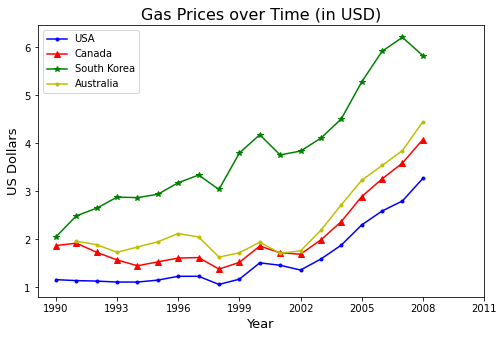

In [100]:
gas = pd.read_csv("gas_prices.csv")

plt.figure(figsize=(8,5))

plt.title("Gas Prices over Time (in USD)",fontdict={'weight': 'normal','size': 16})

plt.plot(gas.Year,gas.USA,"b.-",label="USA")
plt.plot(gas.Year,gas.Canada,"r^-",label="Canada")
plt.plot(gas.Year,gas["South Korea"],"g*-",label="South Korea")
plt.plot(gas.Year,gas.Australia,"y.-",label="Australia")

# Another Way to plot many values!
# countries_to_look_at = ['Australia', 'USA', 'Canada', 'South Korea']
# for country in gas:
#     if country in countries_to_look_at:
#         plt.plot(gas.Year, gas[country], marker='.')


plt.xticks(gas.Year[::3].tolist()+[2011])

plt.xlabel("Year",fontdict={"fontweight":"normal","size":13})
plt.ylabel("US Dollars",fontdict={"fontweight":"normal","size":13})

plt.legend()

plt.savefig("Gas_Price_Graph.png",dpi=300)

plt.show()

### Load Fifa Data

In [115]:
fifa = pd.read_csv("fifa_data.csv")
fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Histograms

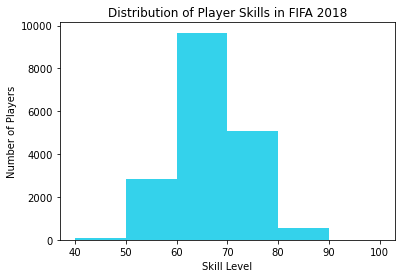

In [114]:
bins=[40,50,60,70,80,90,100]

plt.hist(fifa.Overall,bins=bins,color="#34d2eb") #color picker

plt.xticks(bins)

plt.ylabel("Number of Players")
plt.xlabel("Skill Level")
plt.title("Distribution of Player Skills in FIFA 2018")

plt.show()

### Pie chart

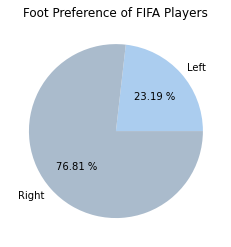

In [139]:
left = fifa.loc[fifa["Preferred Foot"] == "Left"].count()[0]
right = fifa.loc[fifa["Preferred Foot"] == "Right"].count()[0]

labels = ["Left","Right"]
colors = ["#abcdef","#aabbcc"]

plt.pie([left,right], labels=labels, colors=colors,autopct="%.2f %%")

plt.title("Foot Preference of FIFA Players")

plt.show()

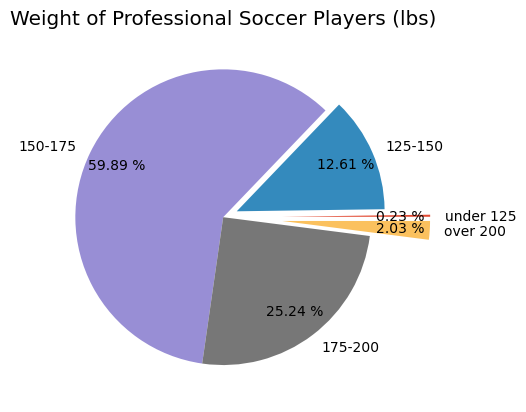

In [174]:
fifa.Weight = [int(x.strip("lbs")) if type(x)==str else x for x in fifa.Weight]

plt.style.use("ggplot")

light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa.loc[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa.loc[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa.loc[fifa.Weight >= 200].count()[0]

weights = [light,light_medium,medium,medium_heavy,heavy]
labels = ["under 125", "125-150", "150-175", "175-200", "over 200"]
explode = [0.4,0.1,0,0,0.4]

plt.title("Weight of Professional Soccer Players (lbs)")

plt.pie(weights,labels=labels,autopct="%.2f %%",pctdistance=0.8,explode=explode)

plt.show()

### Box and Whiskers Chart

C:\Users\karga\AppData\Local\Temp/ipykernel_24280/1882521070.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  box.set(color='#4286f4',Linewidth=2)


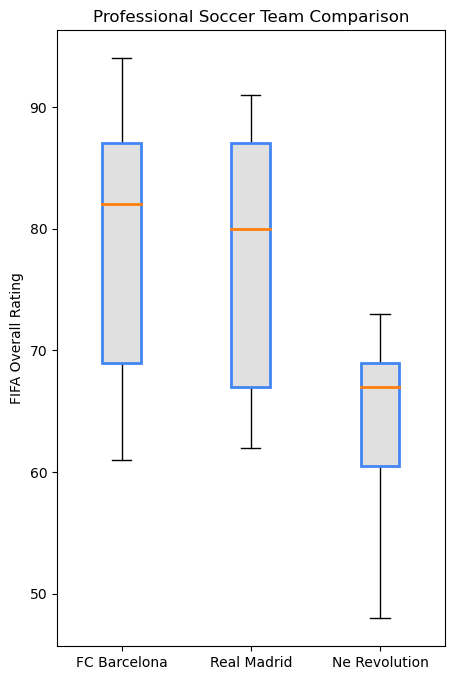

In [206]:
plt.style.use("default")

plt.figure(figsize=(5,8))

barcelona = fifa.loc[fifa.Club == "FC Barcelona"]["Overall"]
madrid = fifa.loc[fifa.Club == "Real Madrid"]["Overall"]
rev = fifa.loc[fifa.Club == "New England Revolution"]["Overall"]

labels = ["FC Barcelona","Real Madrid","Ne Revolution"]
boxes = plt.boxplot([barcelona,madrid,rev],labels=labels,patch_artist=True,medianprops={"linewidth":2})

for box in boxes["boxes"]:
    #set edge color
    box.set(color='#4286f4',Linewidth=2)
    
    #set fill color
    box.set(facecolor='#e0e0e0')

plt.title("Professional Soccer Team Comparison")
plt.ylabel("FIFA Overall Rating")

plt.show()